In [1]:
import numpy as np
import pandas as pd

In [2]:
Kanto = pd.read_csv("../Data/Kanto.csv").drop("Unnamed: 0",axis=1)
Johto = pd.read_csv("../Data/Johto.csv").drop("Unnamed: 0",axis=1)

In [3]:
from sklearn.cluster import KMeans

In [4]:
Kanto.columns

Index(['pokedex_no', 'name', 'type1', 'type2', 'moves', 'hp', 'attack',
       'defense', 'special-attack', 'special-defense', 'speed'],
      dtype='object')

In [5]:
df= Kanto[['hp', 'attack',
       'defense', 'special-attack', 'special-defense', 'speed']]

In [6]:
wcss=[]
for i in range(1,16):
    kn =KMeans(n_clusters=i)
    kn.fit_predict(df)
    wcss.append(kn.inertia_)
    
    

C:\Users\athar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\athar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [7]:
import matplotlib.pyplot as plt

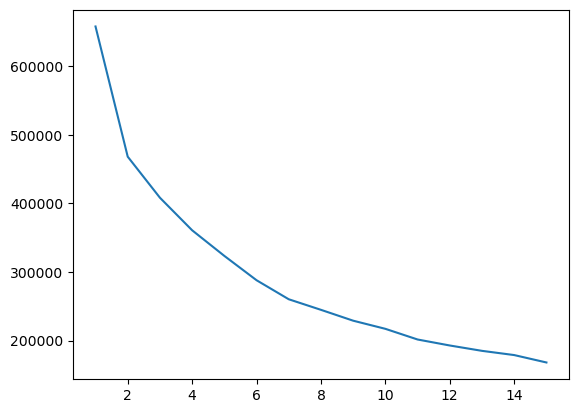

In [8]:
plt.plot(range(1,16),wcss)

In [36]:
km =KMeans(n_clusters=7)
y_mean = km.fit_predict(df)

C:\Users\athar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
df["clusters"]=y_mean

C:\Users\athar\AppData\Local\Temp\ipykernel_11904\1439567211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clusters"]=y_mean


In [38]:
df.head()

,hp,attack,defense,special-attack,special-defense,speed,clusters
0,45,49,49,65,65,45,4
1,60,62,63,80,80,60,4
2,80,82,83,100,100,80,2
3,39,52,43,60,50,65,0
4,58,64,58,80,65,80,1


### PLoting

In [39]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Select only the stat columns
# stats = df[['hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']]

# # Reduce to 2D using PCA
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(stats)

# df['PCA1'] = pca_result[:, 0]
# df['PCA2'] = pca_result[:, 1]

# # Plot
# plt.figure(figsize=(8,6))
# sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='clusters', palette='Set2', s=100)
# plt.title('Pokémon Clusters (PCA Projection)')
# plt.show()


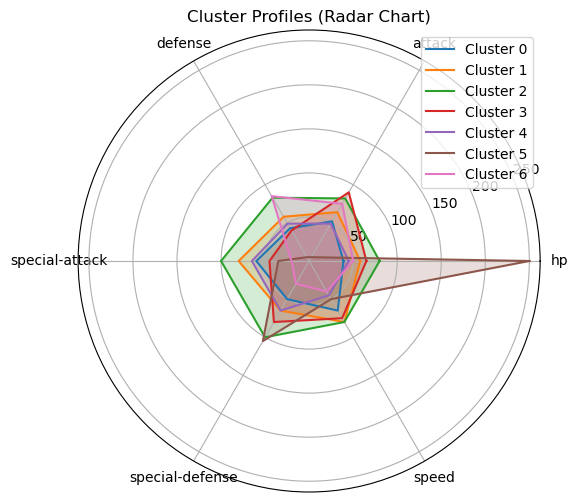

In [40]:
import numpy as np

# Choose one Pokémon per cluster
sample = df.groupby('clusters').first().reset_index()

labels = ['hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, row in sample.iterrows():
    values = row[labels].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {int(row["clusters"])}')
    ax.fill(angles, values, alpha=0.2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.legend(loc='upper right')
plt.title("Cluster Profiles (Radar Chart)")
plt.show()


In [43]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pokemon_vs_cluster(df, name):
    index= Kanto[Kanto["name"]==name].index[0]
    # Stat labels
    labels = ['hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # To close the loop

    # Get Pokémon row and cluster
    pokemon = df.loc[index]
    cluster_id = pokemon['clusters']

    # Get values for radar
    poke_values = pokemon[labels].values.tolist() + [pokemon[labels[0]]]
    cluster_mean = df[df['clusters'] == cluster_id][labels].mean().tolist() + [df[df['clusters'] == cluster_id][labels[0]].mean()]

    # Setup plots
    fig, axes = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(12, 6))

    # Plot 1: Specific Pokémon
    axes[0].plot(angles, poke_values, color='blue', linewidth=2)
    axes[0].fill(angles, poke_values, color='blue', alpha=0.25)
    axes[0].set_title(f"Pokémon at Index {index}", size=14)
    axes[0].set_xticks(angles[:-1])
    axes[0].set_xticklabels(labels)

    # Plot 2: Cluster Mean
    axes[1].plot(angles, cluster_mean, color='green', linewidth=2)
    axes[1].fill(angles, cluster_mean, color='green', alpha=0.25)
    axes[1].set_title(f"Cluster {int(cluster_id)} Mean Stats", size=14)
    axes[1].set_xticks(angles[:-1])
    axes[1].set_xticklabels(labels)

    plt.tight_layout()
    plt.show()


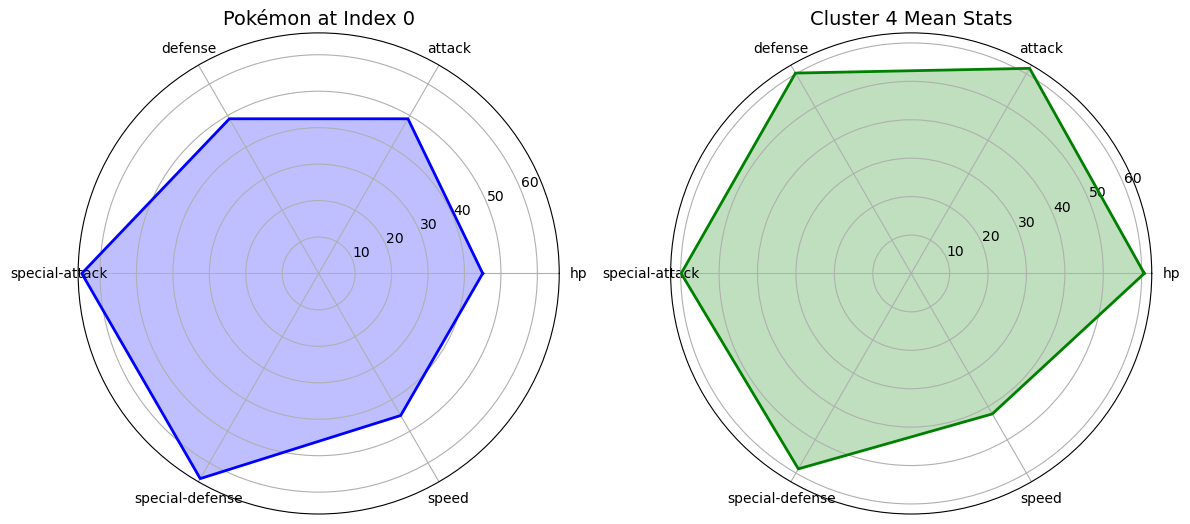

In [44]:
plot_pokemon_vs_cluster(df,"bulbasaur")

In [47]:
df[df["clusters"]==2]

,hp,attack,defense,special-attack,special-defense,speed,clusters
2,80,82,83,100,100,80,2
5,78,84,78,109,85,100,2
8,79,83,100,85,105,78,2
30,90,92,87,75,85,76,2
33,81,102,77,85,75,85,2
35,95,70,73,95,90,60,2
37,73,76,75,81,100,100,2
39,140,70,45,85,50,45,2
44,75,80,85,110,90,50,2
54,80,82,78,95,80,85,2


In [52]:
df[(df["special-attack"]>=df["special-attack"].mean()) & (df["special-defense"]>=df["special-defense"].mean())]

,hp,attack,defense,special-attack,special-defense,speed,clusters
1,60,62,63,80,80,60,4
2,80,82,83,100,100,80,2
5,78,84,78,109,85,100,2
8,79,83,100,85,105,78,2
11,60,45,50,90,80,70,1
17,83,80,75,70,70,101,3
25,60,90,55,90,80,110,1
30,90,92,87,75,85,76,2
33,81,102,77,85,75,85,2
35,95,70,73,95,90,60,2


In [46]:
Kanto["name"][112]

'chansey'

In [53]:
Kanto.columns

Index(['pokedex_no', 'name', 'type1', 'type2', 'moves', 'hp', 'attack',
       'defense', 'special-attack', 'special-defense', 'speed'],
      dtype='object')

In [54]:
Kanto.head(2)

,pokedex_no,name,type1,type2,moves,hp,attack,defense,special-attack,special-defense,speed
0,1,bulbasaur,grass,poison,"[['razor-wind', 'normal'], ['swords-dance', 'n...",45,49,49,65,65,45
1,2,ivysaur,grass,poison,"[['swords-dance', 'normal'], ['cut', 'normal']...",60,62,63,80,80,60
